# 航空公司客户价值分析

RFM模型：最近消费时间间隔（Recency）、消费频率（Frequency）和消费金额（Monetary）

由于消费金额的局限性，用飞行里程M和折扣系数C代替消费金额；并增加客户关系程度L。LRFMC模型：客户关系长度（L）、消费时间间隔（R）、消费频率（F）、飞行里程（M）和折扣系数的平均值（C）。

L：会员入会时间距观测窗口结束的月数；

R：客户最近一次乘坐公司飞机距离窗口结束的月数；

F：客户在观测窗口内乘坐公司的次数

M：客户在观测窗口内累计的飞行里程

C：客户在观测窗口内乘坐舱位所对应的折扣系数平均值

In [1]:
import  pandas as pd
datafile = 'F:/pydata/Data/chapter7/demo/data/air_data.csv'
resultfile = '/charpter7/explore.xls'
data = pd.read_csv(datafile,encoding='utf-8')

In [2]:
explore = data.describe(percentiles = [], include = 'all').T
explore

,count,unique,top,freq,mean,std,min,50%,max
MEMBER_NO,62988,NaN,NaN,NaN,31494.5,18183.2,1,31494.5,62988
FFP_DATE,62988,3068,2011/01/13,184,NaN,NaN,NaN,NaN,NaN
FIRST_FLIGHT_DATE,62988,3406,2013/02/16,96,NaN,NaN,NaN,NaN,NaN
GENDER,62985,2,男,48134,NaN,NaN,NaN,NaN,NaN
FFP_TIER,62988,NaN,NaN,NaN,4.10216,0.373856,4,4,6
WORK_CITY,60719,3310,广州,9385,NaN,NaN,NaN,NaN,NaN
WORK_PROVINCE,59743,1186,广东,17507,NaN,NaN,NaN,NaN,NaN
WORK_COUNTRY,62962,118,CN,57748,NaN,NaN,NaN,NaN,NaN
AGE,62568,NaN,NaN,NaN,42.4763,9.88591,6,41,110
LOAD_TIME,62988,1,2014/03/31,62988,NaN,NaN,NaN,NaN,NaN


In [4]:
explore['null'] = len(data)-explore['count']
explore = explore[['null','max','min']]
explore.columns = [['空值数','最大值','最小值']]
explore

,空值数,最大值,最小值
MEMBER_NO,0,62988,1
FFP_DATE,0,NaN,NaN
FIRST_FLIGHT_DATE,0,NaN,NaN
GENDER,3,NaN,NaN
FFP_TIER,0,6,4
WORK_CITY,2269,NaN,NaN
WORK_PROVINCE,3245,NaN,NaN
WORK_COUNTRY,26,NaN,NaN
AGE,420,110,6
LOAD_TIME,0,NaN,NaN


In [10]:
explore.to_excel('charpter7/explore.xlsx')

In [11]:
# 数据清洗，保留票价非空
data = data[data['SUM_YR_1'].notnull()*data['SUM_YR_2'].notnull()]

# 只保留票价非0，或者平均折扣率与飞行公里数同时为0的记录
index1 = data['SUM_YR_1'] != 0
index2 = data['SUM_YR_2'] != 0
index3 = (data['SEG_KM_SUM'] == 0 & (data['avg_discount'] == 0))
data = data[index1 | index2 | index3]

C:\Anaconda3\lib\site-packages\pandas\computation\expressions.py:182: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  unsupported[op_str]))


In [13]:
data.to_excel('charpter7/cleanedfile.xlsx')

In [15]:
data = data[['LOAD_TIME','FFP_DATE','LAST_TO_END',
             'FLIGHT_COUNT','SEG_KM_SUM','avg_discount']]
data

,LOAD_TIME,FFP_DATE,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM,avg_discount
0,2014/03/31,2006/11/02,1,210,580717,0.961639
1,2014/03/31,2007/02/19,7,140,293678,1.252314
2,2014/03/31,2007/02/01,11,135,283712,1.254676
3,2014/03/31,2008/08/22,97,23,281336,1.090870
4,2014/03/31,2009/04/10,5,152,309928,0.970658
5,2014/03/31,2008/02/10,79,92,294585,0.967692
6,2014/03/31,2006/03/22,1,101,287042,0.965347
7,2014/03/31,2010/04/09,3,73,287230,0.962070
8,2014/03/31,2011/06/07,6,56,321489,0.828478
9,2014/03/31,2010/07/05,15,64,375074,0.708010


L = LOAD_TIME - FFP_DATE

R = LAST_TO_END

F = FLIGHT_COUNT

M = SEG_KM_SUM

C = AVG_DISCOUNT

In [45]:
df = pd.DataFrame()
df['L'] = ((pd.to_datetime(data['LOAD_TIME']) - pd.to_datetime(data['FFP_DATE'])).dt.days/30).round(2)
df['R'] = (data['LAST_TO_END']/30).round(2)
df['F'] = data['FLIGHT_COUNT']
df['M'] = data['SEG_KM_SUM']
df['C'] = data['avg_discount'].round(2)

In [46]:
df.describe().T[['max','min']].T

,L,R,F,M,C
max,114.57,24.37,213.0,580717.0,1.50
min,12.17,0.03,2.0,368.0,0.14


In [53]:
data = (df - df.mean(axis=0))/(df.std(axis=0))
data.columns = ['Z'+i for i in df.columns]
data

,ZL,ZR,ZF,ZM,ZC
0,1.435706,-0.945491,14.034016,26.761154,1.286487
1,1.307268,-0.912438,9.073213,13.126864,2.855183
2,1.328498,-0.889301,8.718869,12.653481,2.855183
3,0.658357,-0.416644,0.781585,12.540622,1.989695
4,0.385913,-0.922354,9.923636,13.898736,1.340580
5,0.887280,-0.515803,5.671519,13.169947,1.340580
6,1.701073,-0.945491,6.309337,12.811656,1.340580
7,-0.043274,-0.933923,4.325015,12.820586,1.286487
8,-0.543226,-0.917396,3.120249,14.447881,0.583279
9,-0.145882,-0.867817,3.687198,16.993157,-0.065837


In [54]:
data.to_excel('charpter7/zscoredfile.xlsx')

In [55]:
from sklearn.cluster import KMeans
k = 5
kmodel = KMeans(n_clusters = k, n_jobs = 4)
kmodel.fit(data)

array([2, 2, 2, ..., 3, 4, 4])

In [56]:
# 查看聚类中心
kmodel.cluster_centers_

array([[ 0.05490751, -0.00456613, -0.22770954, -0.23158293,  2.18563009],
       [ 1.16085913, -0.37735709, -0.08683324, -0.09485139, -0.15779683],
       [ 0.48292613, -0.79940459,  2.48309523,  2.42434109,  0.30842526],
       [-0.70020611, -0.41499074, -0.16102962, -0.160829  , -0.25503256],
       [-0.31388815,  1.68629965, -0.57392681, -0.53672534, -0.17336233]])

In [57]:
# 查看各样本对应的类别
kmodel.labels_

array([2, 2, 2, ..., 3, 4, 4])

In [77]:
s = pd.Series(kmodel.labels_)

In [79]:
s.value_counts()

3    24650
1    15722
4    12123
2     5337
0     4212
dtype: int64

In [101]:
result = pd.DataFrame()

In [102]:
result['聚类类别'] = [1,2,3,4,5]
result['聚类个数'] = s.value_counts()
result

,聚类类别,聚类个数
0,1,4212
1,2,15722
2,3,5337
3,4,24650
4,5,12123


In [103]:
result[['ZL','ZR','ZF','ZM','ZC']] = pd.DataFrame(kmodel.cluster_centers_)

In [106]:
result.set_index('聚类类别',inplace=True,drop=True)

In [107]:
result

,聚类个数,ZL,ZR,ZF,ZM,ZC
聚类类别,,,,,,
1,4212,0.054908,-0.004566,-0.227710,-0.231583,2.185630
2,15722,1.160859,-0.377357,-0.086833,-0.094851,-0.157797
3,5337,0.482926,-0.799405,2.483095,2.424341,0.308425
4,24650,-0.700206,-0.414991,-0.161030,-0.160829,-0.255033
5,12123,-0.313888,1.686300,-0.573927,-0.536725,-0.173362


<IPython.core.display.Javascript object>


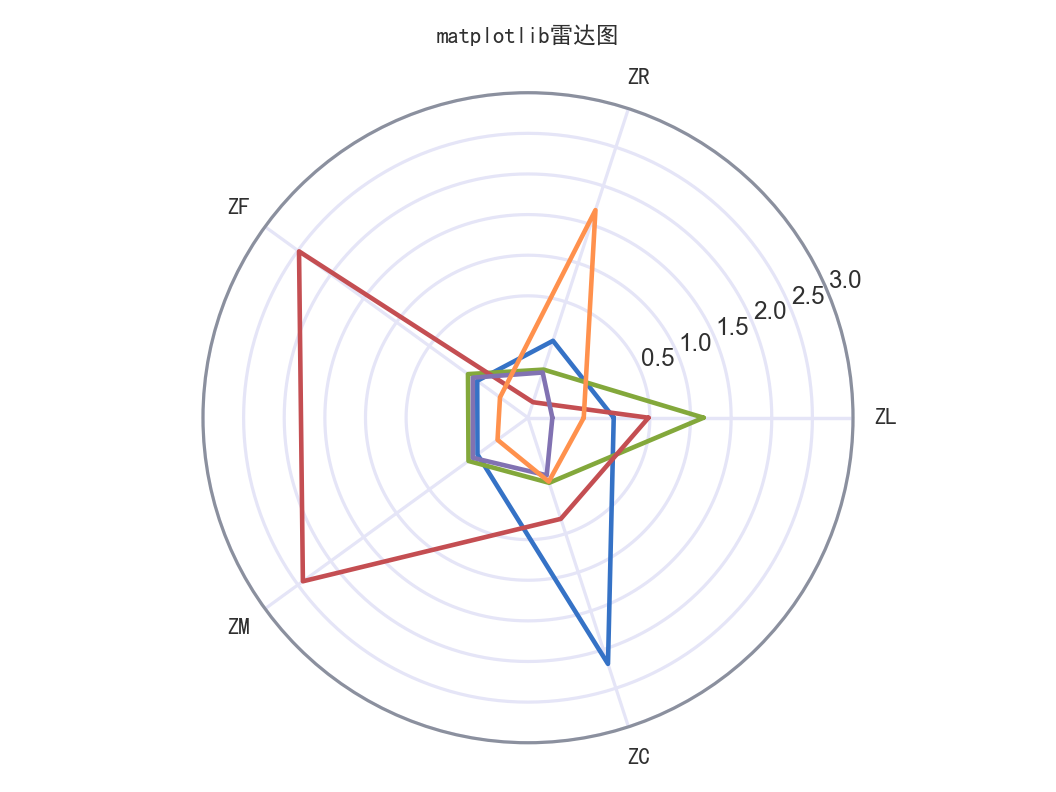

In [125]:
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np
labels = np.array(['ZL','ZR','ZF','ZM','ZC'])
datalength = 5
fig = plt.figure()
ax = fig.add_subplot(111, polar=True)# polar参数！！
for i in range(5):
    data = kmodel.cluster_centers_[i]
    angles = np.linspace(0, 2*np.pi, datalength, endpoint=False)
    data = np.concatenate((data, [data[0]])) # 闭合
    angles = np.concatenate((angles, [angles[0]])) # 闭合
    ax.plot(angles, data, linewidth=2)# 画线
# ax.fill(angles, data, facecolor='r', alpha=0.25)# 填充
ax.set_thetagrids(angles * 180/np.pi, labels, fontproperties="SimHei")
ax.set_title("matplotlib雷达图", va='bottom', fontproperties="SimHei")
ax.set_rlim(-1,3)
ax.grid(True)
plt.show()